# Task 1: Data Preparation


In [ ]:
# Start from here to write your code for Task 1. Please also feel free to add more cells in this ipynb file. 

In [1]:
import pandas as pd
import numpy as np
# Set path and load csv file
path = '/Users/johnsonchang/Desktop/PRAC/PRAC_Assi_1/hotel_bookings_data/hotel_bookings.csv'
hotel_bookings = pd.read_csv(path)

In [2]:
# Check if same as csv data(119392 rows, 32 columns)
hotel_bookings.shape

(119392, 32)

In [5]:
# Check the data
hotel_bookings.head(7)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0.0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0.0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0.0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0.0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0.0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015


In [7]:
# Check the summary statistics of lead_time for outliers
hotel_bookings['lead_time'].describe()

count    119392.000000
mean        104.170857
std         113.959838
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max       10000.000000
Name: lead_time, dtype: float64

In [9]:
# Data more than 465 days account for 0.652 percent of all data
# I think lead_time > 465 are outliers
sum_465up = hotel_bookings[hotel_bookings['lead_time'] > 465]['hotel'].count()
(sum_465up / hotel_bookings['lead_time'].value_counts().sum() * 100).round(3)

0.652

In [11]:
# Replace outliers in lead_time (> 460) with median
lead_time_median = hotel_bookings['lead_time'].median()
hotel_bookings['lead_time'] = np.where(hotel_bookings['lead_time'] > 460, lead_time_median, hotel_bookings['lead_time'])
hotel_bookings['lead_time'].describe()

count    119392.000000
mean        100.551101
std         100.329923
min           0.000000
25%          18.000000
50%          69.000000
75%         157.000000
max         460.000000
Name: lead_time, dtype: float64

In [13]:
# Check the average income per occupied room
hotel_bookings['adr'].describe()

count    119392.000000
mean        101.830768
std          50.535443
min          -6.380000
25%          69.290000
50%          94.560000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [15]:
# I think the outliers are min and max values
small_outliers = hotel_bookings[hotel_bookings['adr'] < 1]['adr'].value_counts()
big_outliers = hotel_bookings[hotel_bookings['adr'] > 5000]['adr'].value_counts()
print(small_outliers, big_outliers)

adr
 0.00    1959
-6.38       1
 0.26       1
 0.50       1
Name: count, dtype: int64 adr
5400.0    1
Name: count, dtype: int64


In [17]:
# Replace outliers in adr with median
adr_median = hotel_bookings['adr'].median()
hotel_bookings['adr'] = np.where((hotel_bookings['adr'] < 1) | (hotel_bookings['adr'] > 5000), adr_median , hotel_bookings['adr'])
hotel_bookings['adr'].describe()

count    119392.000000
mean        103.340307
std          46.334549
min           1.000000
25%          71.245000
50%          94.560000
75%         126.000000
max         510.000000
Name: adr, dtype: float64

In [19]:
# Check the duplicates
hotel_bookings.duplicated().sum()

31992

In [21]:
#Drop duplicates
hotel_bookings = hotel_bookings.drop_duplicates()
hotel_bookings.duplicated().sum()

0

In [23]:
# sanaty check any reservation should have atleast 1 adults
hotel_bookings[hotel_bookings['adults'] < 1]['adults'].value_counts()

adults
0    385
Name: count, dtype: int64

In [25]:
# adults should be atleast 1 , change (adults < 0) into 1
# fix invalid adult values (e.g., adults < 1)
hotel_bookings['adults'] = np.where(hotel_bookings['adults'] < 1, 1 , hotel_bookings['adults'])
hotel_bookings[hotel_bookings['adults'] == 0]['adults']

Series([], Name: adults, dtype: int64)

In [27]:
#check is_repeated_guest
print(hotel_bookings['is_repeated_guest'].value_counts())
print(hotel_bookings['previous_bookings_not_canceled'].describe())

is_repeated_guest
0    83985
1     3415
Name: count, dtype: int64
count    87400.000000
mean         0.183982
std          1.731855
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         72.000000
Name: previous_bookings_not_canceled, dtype: float64


In [29]:
# Sanaty check: Repeated guest with less than 1 successful bookings is wrong,they must have at least 1 non-cancelled booking
mask_sanatyCheck = (hotel_bookings['is_repeated_guest'] > 0) & (hotel_bookings['previous_bookings_not_canceled'] < 1)
hotel_bookings[mask_sanatyCheck]['previous_bookings_not_canceled'].value_counts()

previous_bookings_not_canceled
0    615
Name: count, dtype: int64

In [31]:
# Change previous_bookings_not_canceled = 1 
hotel_bookings['previous_bookings_not_canceled'] = np.where(mask_sanatyCheck, 1 , hotel_bookings['previous_bookings_not_canceled'])
mask_2 = (hotel_bookings['is_repeated_guest'] > 0) & (hotel_bookings['previous_bookings_not_canceled'] < 1)
hotel_bookings[mask_2]['previous_bookings_not_canceled'].value_counts()

Series([], Name: count, dtype: int64)

In [33]:
# Check the booking year 
hotel_bookings['reservation_status_date'].value_counts()

reservation_status_date
14/2/2016     211
25/5/2017     205
21/10/2015    199
6/10/2016     196
28/3/2016     196
             ... 
27/2/2015       1
11/3/2015       1
12/3/2015       1
18/3/2015       1
31/1/1900       1
Name: count, Length: 928, dtype: int64

In [35]:
# Remove rows with reservation_status_date year == '31/1/1900'
hotel_bookings = hotel_bookings[hotel_bookings['reservation_status_date'] != '31/1/1900']
hotel_bookings['reservation_status_date'].value_counts()

reservation_status_date
14/2/2016     211
25/5/2017     205
21/10/2015    199
6/10/2016     196
28/3/2016     196
             ... 
27/2/2015       1
11/3/2015       1
12/3/2015       1
18/3/2015       1
2/2/2015        1
Name: count, Length: 927, dtype: int64

In [37]:
# column with missing values: is_canceled, arrival_date_month, country, company, agent
hotel_bookings.count()

hotel                             87399
is_canceled                       87398
lead_time                         87399
arrival_date_year                 87399
arrival_date_month                87398
arrival_date_week_number          87399
arrival_date_day_of_month         87399
stays_in_weekend_nights           87399
stays_in_week_nights              87399
adults                            87399
children                          87395
babies                            87399
meal                              87399
country                           86945
market_segment                    87399
distribution_channel              87399
is_repeated_guest                 87399
previous_cancellations            87399
previous_bookings_not_canceled    87399
reserved_room_type                87399
assigned_room_type                87399
booking_changes                   87399
deposit_type                      87399
agent                             75204
company                            5259


In [39]:
# check the null values of children 
hotel_bookings['children'].isnull().value_counts()

children
False    87395
True         4
Name: count, dtype: int64

In [41]:
# fill them missing values in children with 0
hotel_bookings['children'] = hotel_bookings['children'].fillna(0)
hotel_bookings['children'].isnull().value_counts()

children
False    87399
Name: count, dtype: int64

In [43]:
#check isnull values 'arrival_date_month'
hotel_bookings['arrival_date_month'].isnull().value_counts()

arrival_date_month
False    87398
True         1
Name: count, dtype: int64

In [45]:
#check isnull values 'is_canceled'
hotel_bookings['is_canceled'].isnull().value_counts()

is_canceled
False    87398
True         1
Name: count, dtype: int64

In [47]:
#check isnull values 'country'
hotel_bookings['country'].isnull().value_counts()

country
False    86945
True       454
Name: count, dtype: int64

In [49]:
# Drops rows where the arrival_date_month/country/is_canceled column is missing.
hotel_bookings = hotel_bookings.dropna(subset = ['arrival_date_month', 'country', 'is_canceled'])
 
print(hotel_bookings['arrival_date_month'].isnull().value_counts())
print(hotel_bookings['is_canceled'].isnull().value_counts())
print(hotel_bookings['country'].isnull().value_counts())

arrival_date_month
False    86943
Name: count, dtype: int64
is_canceled
False    86943
Name: count, dtype: int64
country
False    86943
Name: count, dtype: int64


In [51]:
#check company values
hotel_bookings['company'].isnull().value_counts()

company
True     81851
False     5092
Name: count, dtype: int64

In [53]:
#check agent values
hotel_bookings['agent'].isnull().value_counts()

agent
False    75074
True     11869
Name: count, dtype: int64

In [54]:
# Either fill null or drop the columns,it's hard to analyze them so I choose to drop them
hotel_bookings = hotel_bookings.drop(columns = ['company', 'agent'])

#Final check
hotel_bookings.count()


hotel                             86943
is_canceled                       86943
lead_time                         86943
arrival_date_year                 86943
arrival_date_month                86943
arrival_date_week_number          86943
arrival_date_day_of_month         86943
stays_in_weekend_nights           86943
stays_in_week_nights              86943
adults                            86943
children                          86943
babies                            86943
meal                              86943
country                           86943
market_segment                    86943
distribution_channel              86943
is_repeated_guest                 86943
previous_cancellations            86943
previous_bookings_not_canceled    86943
reserved_room_type                86943
assigned_room_type                86943
booking_changes                   86943
deposit_type                      86943
days_in_waiting_list              86943
customer_type                     86943


In [55]:
# Check reservation_status_dateformat: (DD/MM/YYYY)
matched_mask = hotel_bookings['reservation_status_date'].str.match(r'^(\d{1,3}\d|\d)/(1\d|\d)/\d{4}$')
matched_mask.value_counts()

reservation_status_date
True     86942
False        1
Name: count, dtype: int64

In [56]:
# Drop the unmatched
hotel_bookings = hotel_bookings[matched_mask]
matched_mask2 = hotel_bookings['reservation_status_date'].str.match(r'^(\d{1,3}\d|\d)/(1\d|\d)/\d{4}$')
matched_mask2.value_counts()

reservation_status_date
True    86942
Name: count, dtype: int64

In [61]:
# export to_csv as cleaned_version.csv
hotel_bookings.to_csv('cleaned_version.csv', index = False)

In [63]:
"""
Write dataframe object into a csv file
XXXXX.to_csv('XXXXX.csv', index=False)
Please replace XXXXX with your dataframe variable and name of the csv file.
"""


"\nWrite dataframe object into a csv file\nXXXXX.to_csv('XXXXX.csv', index=False)\nPlease replace XXXXX with your dataframe variable and name of the csv file.\n"

# Task 2: Data Exploration

## Task 2.1 

In [67]:
# Code goes after this line by adding cells

In [69]:
import matplotlib.pyplot as plt
# Load Cleaned data
cleaned_path = 'cleaned_version.csv'
hotel_bookings = pd.read_csv(cleaned_path)

In [70]:
# Create a fake booking dataframe for year 2016
fake_hotel_bookings = hotel_bookings.copy()

# Change the string (DD/MM/YYYY) into date type
fake_hotel_bookings['reservation_status_date'] = pd.to_datetime(
    hotel_bookings['reservation_status_date'],
    dayfirst=True)

# Filter for 2016
mask_2016 = fake_hotel_bookings['reservation_status_date'].dt.year == 2016
fake_hotel_bookings = fake_hotel_bookings[mask_2016]

# Add a month column
fake_hotel_bookings['month'] = fake_hotel_bookings['reservation_status_date'].dt.month


In [73]:
# Create an empty DataFrame for plotting
plt_df = pd.DataFrame()
# Total bookings per month
plt_df['bookings'] = fake_hotel_bookings.groupby('month')['is_canceled'].count()
# Total cancellations cancel(1) and not calcel(0) per month
plt_df['cancellations'] = fake_hotel_bookings.groupby('month')['is_canceled'].sum()
# Successful bookings = total - cancellations
plt_df['successful_bookings'] = plt_df['bookings'] - plt_df['cancellations']
# Average lead time per month
plt_df['avg_lead_time'] = fake_hotel_bookings.groupby('month')['lead_time'].mean()


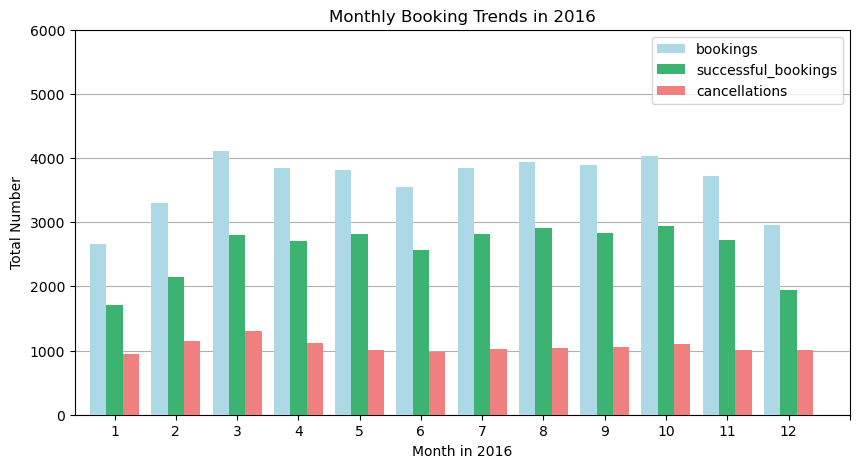

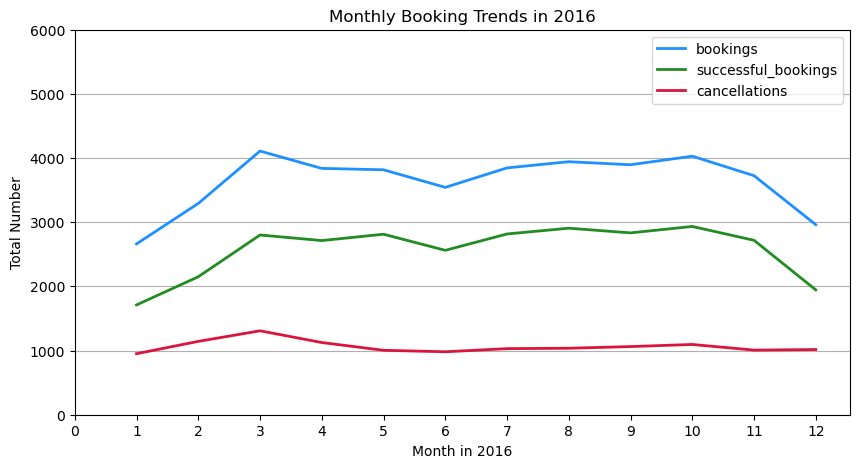

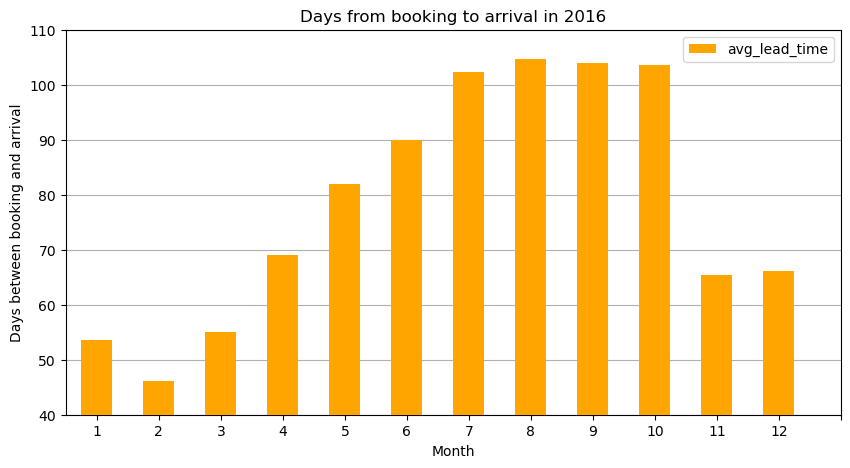

In [75]:
# Create a bar plot to show all the booking types
plt_df[['bookings', 'successful_bookings', 'cancellations']].plot(
    kind = 'bar',
    width = 0.8,
    figsize = (10, 5), 
    color = ['lightblue', 'mediumseagreen', 'lightcoral'],
    zorder = 3)
plt.title('Monthly Booking Trends in 2016')
plt.xlabel('Month in 2016')
plt.ylabel('Total Number')
plt.ylim(0,6000)
plt.xticks(rotation = 0, ticks = range(0, 13))
plt.ylim(0,6000)
plt.grid(axis = 'y')
plt.show()

#Change into a line plot to see the trend 
plt_df[['bookings', 'successful_bookings', 'cancellations']].plot(
    kind = 'line',
    figsize = (10, 5),
    linewidth = 2,
    color = ['dodgerblue', 'forestgreen', 'crimson'])
plt.title('Monthly Booking Trends in 2016')
plt.xlabel('Month in 2016')
plt.ylabel('Total Number')
plt.ylim(0,6000)
plt.xticks(rotation = 0, ticks = range(0, 13))
plt.grid(axis = 'y')
plt.show()

# Check the avg_lead_time 
plt_df[['avg_lead_time']].plot(
    kind = 'bar',
    figsize = (10, 5), 
    color = 'orange',
    zorder = 3)
plt.title('Days from booking to arrival in 2016')
plt.xlabel('Month')
plt.ylabel('Days between booking and arrival')
plt.ylim(40,110)
plt.xticks(rotation = 0, ticks = range(0, 13))
plt.grid(axis = 'y')
plt.show()


### For Q1:
#### The lowest booking volume occurred in December and January, so business should provide more incentive or discounts during those months to  reduce room vacancy rates. Additionally, marketing and pricing strategies should target on May and November, which show lower cancellation rates with tailored promotions to increase revenue.

#### The plot "Days from booking to arrival"  shows that travelers tend to plan ahead for trips from July to October, booking approximately 3 months in advance for these times.

## Task 2.2 

In [79]:
# create fake hotel DataFrame for year 2015-2017
fake_hotel_1517 = hotel_bookings.copy()

# change the date column type
fake_hotel_1517['reservation_status_date'] = pd.to_datetime(
    fake_hotel_1517['reservation_status_date'],
    dayfirst=True)

# add a month column
fake_hotel_1517['month'] = (fake_hotel_1517['reservation_status_date'].dt.month)
# add a year column
fake_hotel_1517['years'] = (fake_hotel_1517['reservation_status_date'].dt.year)
#  add year & month column, remove the day component 
fake_hotel_1517['month_with_years'] = fake_hotel_1517['reservation_status_date'].dt.to_period('M')

In [81]:
# Filter for year 2015-2017
mask_1517 = (fake_hotel_1517['reservation_status_date'].dt.year < 2018) & (fake_hotel_1517['reservation_status_date'].dt.year > 2014)
fake_hotel_1517 = fake_hotel_1517[mask_1517]

In [83]:
# Remove outliers in 2015-01 & '2017-09' but keep 1 because the data looks like testing data
# get the mask for  != '2015-01'
mask_not = (fake_hotel_1517['month_with_years'] != '2015-01') & (fake_hotel_1517['month_with_years'] != '2017-09')
mask_yes = (fake_hotel_1517['month_with_years'] == '2015-01') & (fake_hotel_1517['month_with_years'] == '2017-09')
the_one = fake_hotel_1517[mask_yes].head(1)
# keep the only one for better ploting, Set that index to True in the mask to keep it
mask_not.loc[the_one.index] = True
# Filter out all the outliers and keep 1
fake_hotel_1517 = fake_hotel_1517[mask_not]

In [85]:
# create a DataFrame for ploting groupby('month_with_years')
plt_df_1517 = pd.DataFrame()

# create columns for plotting
plt_df_1517['bookings_1517'] = fake_hotel_1517.groupby('month_with_years')['is_canceled'].count()
plt_df_1517['cancellations_1517'] = fake_hotel_1517.groupby('month_with_years')['is_canceled'].sum()
plt_df_1517['successful_bookings_1517'] = plt_df_1517['bookings_1517'] - plt_df_1517['cancellations_1517']


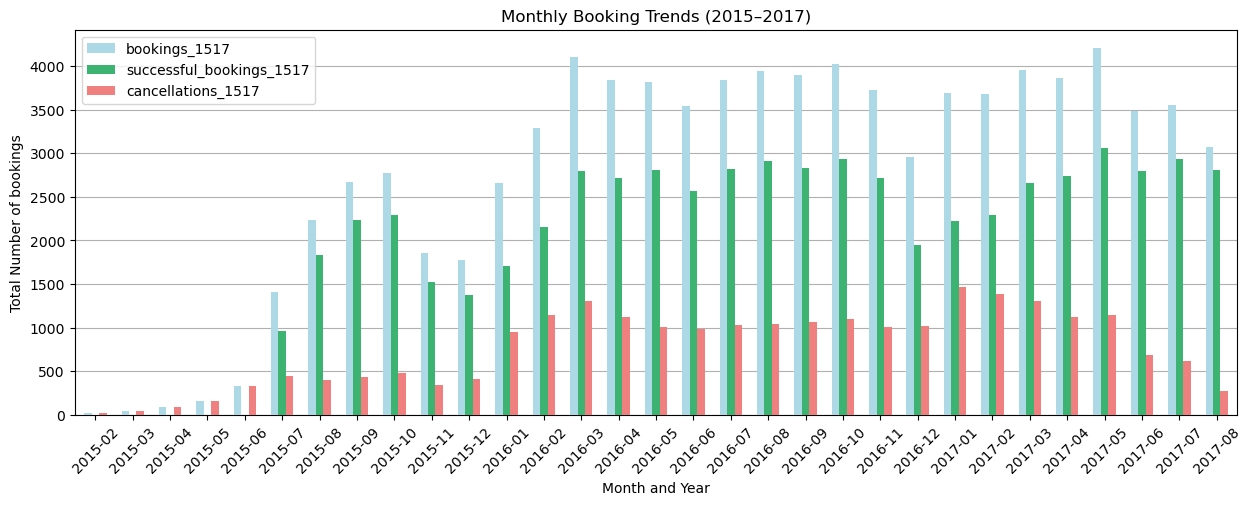

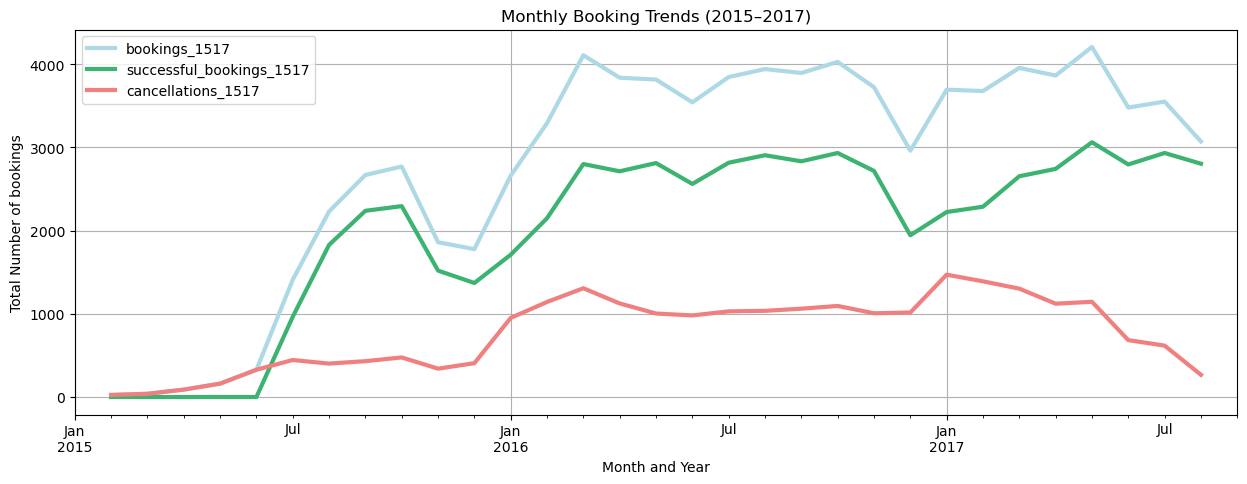

In [87]:
# Create the bar graph from 2015-2017
plt_df_1517[['bookings_1517','successful_bookings_1517', 'cancellations_1517']].plot(
    kind = 'bar',
    width = 0.6,
    figsize = (15, 5),
    color = ['lightblue', 'mediumseagreen', 'lightcoral'],
    zorder = 3)
plt.title('Monthly Booking Trends (2015–2017)')
plt.xlabel('Month and Year')
plt.ylabel('Total Number of bookings')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

# Plot the line plot for a clearer view
plt_df_1517[['bookings_1517', 'successful_bookings_1517', 'cancellations_1517']].plot(
    kind ='line',
    figsize = (15, 5),
    color = ['lightblue', 'mediumseagreen', 'lightcoral'],
    linewidth = 3)
plt.title('Monthly Booking Trends (2015–2017)')
plt.xlim('2015-01', '2017-09')
plt.xlabel('Month and Year')
plt.ylabel('Total Number of bookings')
plt.grid(True)
plt.show()




In [88]:
# create a new DataFrame for plotting faceted by years
plt_df_1517_2 = pd.DataFrame()

# mask for each years
mask_2015 = fake_hotel_1517['reservation_status_date'].dt.year == 2015
mask_2016 = fake_hotel_1517['reservation_status_date'].dt.year == 2016
mask_2017 = fake_hotel_1517['reservation_status_date'].dt.year == 2017

# Total bookings
plt_df_1517_2['bookings_2015'] = fake_hotel_1517[mask_2015].groupby('month')['is_canceled'].count()
plt_df_1517_2['bookings_2016'] = fake_hotel_1517[mask_2016].groupby('month')['is_canceled'].count()
plt_df_1517_2['bookings_2017'] = fake_hotel_1517[mask_2017].groupby('month')['is_canceled'].count()

# Cancellations
plt_df_1517_2['cancellations_2015'] = fake_hotel_1517[mask_2015].groupby('month')['is_canceled'].sum()
plt_df_1517_2['cancellations_2016'] = fake_hotel_1517[mask_2016].groupby('month')['is_canceled'].sum()
plt_df_1517_2['cancellations_2017'] = fake_hotel_1517[mask_2017].groupby('month')['is_canceled'].sum()

# Successful Bookings
plt_df_1517_2['successful_bookings_2015'] = plt_df_1517_2['bookings_2015'] - plt_df_1517_2['cancellations_2015']
plt_df_1517_2['successful_bookings_2016'] = plt_df_1517_2['bookings_2016'] - plt_df_1517_2['cancellations_2016']
plt_df_1517_2['successful_bookings_2017'] = plt_df_1517_2['bookings_2017'] - plt_df_1517_2['cancellations_2017']


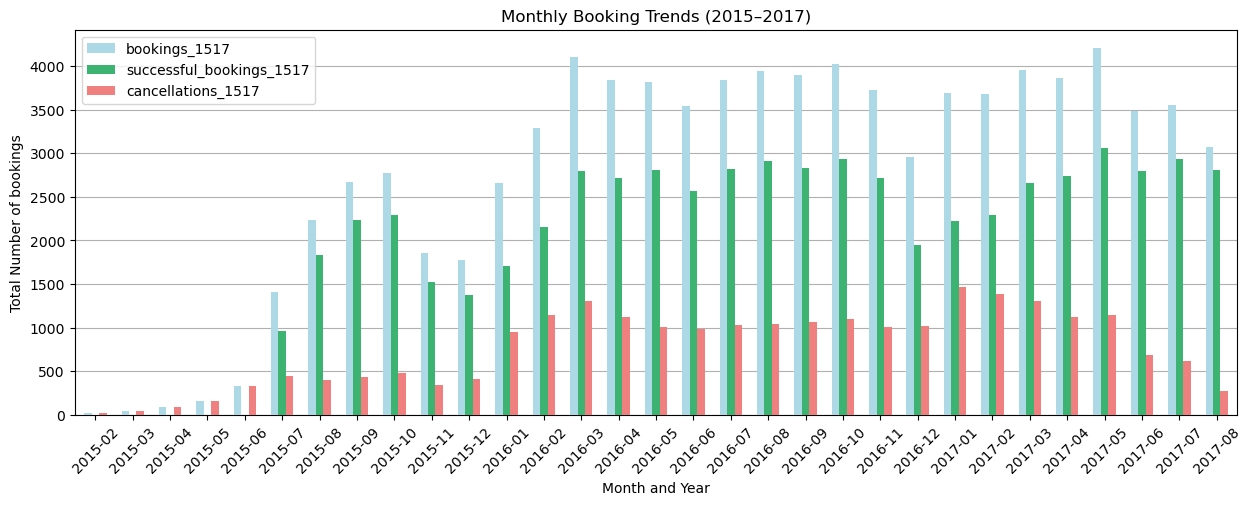

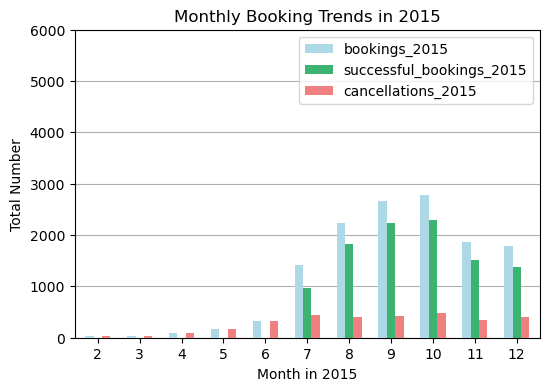

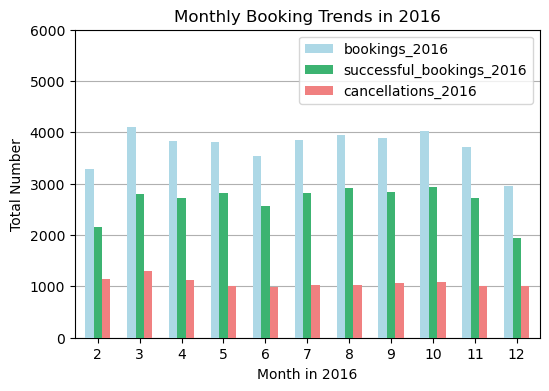

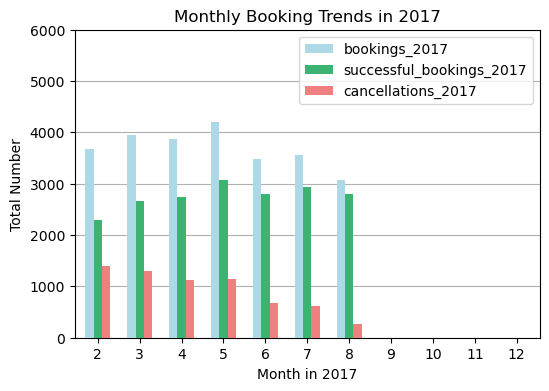

In [91]:
# plot the bar graph
plt_df_1517[['bookings_1517','successful_bookings_1517', 'cancellations_1517']].plot(
    kind = 'bar',
    width = 0.6,
    figsize = (15, 5),
    color = ['lightblue', 'mediumseagreen', 'lightcoral'],
    zorder = 3)
plt.title('Monthly Booking Trends (2015–2017)')
plt.xlabel('Month and Year')
plt.ylabel('Total Number of bookings')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.show()

# facet the bar plot in different years(2015)
plt_df_1517_2[['bookings_2015', 'successful_bookings_2015', 'cancellations_2015']].plot(
    kind = 'bar', 
    width = 0.6, 
    figsize = (6, 4), 
    color = ['lightblue', 'mediumseagreen', 'lightcoral'],
    zorder = 3)
plt.title('Monthly Booking Trends in 2015')
plt.xlabel('Month in 2015')
plt.ylabel('Total Number')
plt.xticks(rotation = 0)  
plt.grid(axis = 'y')
plt.ylim(0,6000)
plt.show()

# facet the bar plot in different years(2016)
plt_df_1517_2[['bookings_2016', 'successful_bookings_2016', 'cancellations_2016']].plot(
    kind = 'bar', 
    width = 0.6, 
    figsize = (6, 4), 
    color = ['lightblue', 'mediumseagreen', 'lightcoral'],
    zorder = 3)
plt.title('Monthly Booking Trends in 2016')
plt.xlabel('Month in 2016')
plt.ylabel('Total Number')
plt.xticks(rotation = 0)  
plt.grid(axis = 'y')
plt.ylim(0,6000)
plt.show()

# facet the bar plot in different years(2017)
plt_df_1517_2[['bookings_2017', 'successful_bookings_2017', 'cancellations_2017']].plot(
    kind = 'bar', 
    width = 0.6, 
    figsize = (6, 4), 
    color = ['lightblue', 'mediumseagreen', 'lightcoral'],
    zorder = 3)
plt.title('Monthly Booking Trends in 2017')
plt.xlabel('Month in 2017')
plt.ylabel('Total Number')
plt.xticks(rotation = 0)  
plt.grid(axis = 'y')
plt.ylim(0,6000)
plt.show()


### For Q2:
#### The line plot and the bar plot shows Monthly Booking Trends (2015–2017) reveals that the business began in January 2015 and the data collection came to the end in September 2017.  The analysis of the 2016 data highlights the more stable business operation in that year indicating seasonal patterns in the travel market. The line chart has two dips in November and December, suggesting a decline in bookings during the late-year period

## Task 2.3

In [95]:
# create a fake booking
fake_bookings = hotel_bookings.copy()

# calculate the percentage of Top 5 countries
top_5 = fake_bookings['country'].value_counts().head(5)
total = fake_bookings['country'].value_counts().sum()
top_5_byPercent = (top_5 / total * 100).round(1)
top_5_byPercent.sum().round(2)
print('Top 5 countries account for ', top_5_byPercent.sum().round(2), ' percent of the total bookings')

Top 5 countries account for  68.3  percent of the total bookings


In [97]:
# Filter rows for Top5 countries data and put into Top5_bookings
top5_mask = fake_bookings['country'].isin(top_5.index)
Top5_bookings = fake_bookings[top5_mask]
# Display results
Top5_bookings.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,94.56,0,0,Check-Out,1/7/2015
1,Resort Hotel,0.0,69.0,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,94.56,0,0,Check-Out,1/7/2015
2,Resort Hotel,0.0,7.0,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0.0,13.0,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0.0,14.0,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,3/7/2015


In [99]:
# 1. get weekend and weekday night stay of each country
# 2. get total night stay by adding them together

# make 5 country mask for calculation
mask_PRT = Top5_bookings['country'] == 'PRT'
mask_GBR = Top5_bookings['country'] == 'GBR'
mask_FRA = Top5_bookings['country'] == 'FRA'
mask_ESP = Top5_bookings['country'] == 'ESP'
mask_DEU = Top5_bookings['country'] == 'DEU'

# Portugal
wkend_PRT = Top5_bookings[mask_PRT]['stays_in_weekend_nights'].value_counts()
wkday_PRT = Top5_bookings[mask_PRT]['stays_in_week_nights'].value_counts()
PRT_wkend_night = sum(wkend_PRT.index * wkend_PRT.values)
PRT_wkday_night = sum(wkday_PRT.index * wkday_PRT.values)
PRT_night_stay = PRT_wkend_night + PRT_wkday_night

# UK
wkend_GBR = Top5_bookings[mask_GBR]['stays_in_weekend_nights'].value_counts()
wkday_GBR = Top5_bookings[mask_GBR]['stays_in_week_nights'].value_counts()
GBR_wkend_night = sum(wkend_GBR.index * wkend_GBR.values)
GBR_wkday_night = sum(wkday_GBR.index * wkday_GBR.values)
GBR_night_stay = GBR_wkend_night + GBR_wkday_night

# France
wkend_FRA = Top5_bookings[mask_FRA]['stays_in_weekend_nights'].value_counts()
wkday_FRA = Top5_bookings[mask_FRA]['stays_in_week_nights'].value_counts()
FRA_wkend_night = sum(wkend_FRA.index * wkend_FRA.values)
FRA_wkday_night = sum(wkday_FRA.index * wkday_FRA.values)
FRA_night_stay = FRA_wkend_night + FRA_wkday_night

# Spain
wkend_ESP = Top5_bookings[mask_ESP]['stays_in_weekend_nights'].value_counts()
wkday_ESP = Top5_bookings[mask_ESP]['stays_in_week_nights'].value_counts()
ESP_wkend_night = sum(wkend_ESP.index * wkend_ESP.values)
ESP_wkday_night = sum(wkday_ESP.index * wkday_ESP.values)
ESP_night_stay = ESP_wkend_night + ESP_wkday_night

# Germany
wkend_DEU = Top5_bookings[mask_DEU]['stays_in_weekend_nights'].value_counts()
wkday_DEU = Top5_bookings[mask_DEU]['stays_in_week_nights'].value_counts()
DEU_wkend_night = sum(wkend_DEU.index * wkend_DEU.values)
DEU_wkday_night = sum(wkday_DEU.index * wkday_DEU.values)
DEU_night_stay = DEU_wkend_night + DEU_wkday_night



In [101]:
# boooking numers of 5 countries
boooking_num = Top5_bookings['country'].value_counts()
boooking_num

country
PRT    27456
GBR    10433
FRA     8837
ESP     7252
DEU     5386
Name: count, dtype: int64

In [103]:
# get average stay night using (total night stay / boooking_num)
avg_night_stayPRT = PRT_night_stay / boooking_num.iloc[0]
avg_night_stayGBR = GBR_night_stay / boooking_num.iloc[1]
avg_night_stayFRA = FRA_night_stay / boooking_num.iloc[2]
avg_night_stayESP = ESP_night_stay / boooking_num.iloc[3]
avg_night_stayDEU = DEU_night_stay / boooking_num.iloc[4]


In [105]:
# calculate cancellation rate group by country
cancellation_rate_by_country = Top5_bookings.groupby('country')['is_canceled'].mean()
# Convert to percentage 
cancellation_rate = (cancellation_rate_by_country * 100).round(2)

cancellation_rate


country
DEU    19.53
ESP    25.68
FRA    19.61
GBR    19.03
PRT    35.66
Name: is_canceled, dtype: float64

In [107]:
# lead_time group by country
# group by country and calculate mean 
avglead_time_by_country = Top5_bookings.groupby('country')['lead_time'].mean()
avglead_time_by_country


country
DEU    105.108429
ESP     52.196773
FRA     73.863755
GBR    115.989361
PRT     63.377695
Name: lead_time, dtype: float64

In [109]:
# Understanding the data 
# count the value of is_repeated_guest and get counts(0&1) for each countries
Top5_bookings.groupby('country')['is_repeated_guest'].value_counts()

country  is_repeated_guest
DEU      0                     5365
         1                       21
ESP      0                     7163
         1                       89
FRA      0                     8761
         1                       76
GBR      0                    10326
         1                      107
PRT      0                    24583
         1                     2873
Name: count, dtype: int64

In [111]:
# Set the repeated_guest rate
Top5_repetead_guest_rate = Top5_bookings.groupby('country')['is_repeated_guest'].mean()
# Convert to percentage 
repetead_guest_rate = (Top5_repetead_guest_rate * 100).round(2)

repetead_guest_rate


country
DEU     0.39
ESP     1.23
FRA     0.86
GBR     1.03
PRT    10.46
Name: is_repeated_guest, dtype: float64

In [113]:
# Put all the data into dataframe
Top5_df = pd.DataFrame({
    'Country': ['Portugal', 'United_Kingdom', 'France', 'Spain', 'Germany'],
    'Booking_Count': [
        boooking_num.iloc[0], boooking_num.iloc[1],
        boooking_num.iloc[2], boooking_num.iloc[3], boooking_num.iloc[4]],
    'Weekend_Night_Stay': [PRT_wkend_night, GBR_wkend_night, FRA_wkend_night, ESP_wkend_night, DEU_wkend_night],
    'Weekday_Night_Stay': [PRT_wkday_night, GBR_wkday_night, FRA_wkday_night, ESP_wkday_night, DEU_wkday_night],
    'Total_Night_Stay': [PRT_night_stay, GBR_night_stay, FRA_night_stay, ESP_night_stay, DEU_night_stay],
    'Repeat_Guest_Rate': [
        repetead_guest_rate.iloc[4], repetead_guest_rate.iloc[3],
        repetead_guest_rate.iloc[2], repetead_guest_rate.iloc[1], repetead_guest_rate.iloc[0]],
    'Cancellation_Rate': [
        cancellation_rate.iloc[4], cancellation_rate.iloc[3],
        cancellation_rate.iloc[2], cancellation_rate.iloc[1], cancellation_rate.iloc[0]],
    'Avg_Lead_Time': [
        avglead_time_by_country.iloc[4], avglead_time_by_country.iloc[3],
        avglead_time_by_country.iloc[2], avglead_time_by_country.iloc[1], avglead_time_by_country.iloc[0]], 
    'Avg_night_stay':[ avg_night_stayPRT, avg_night_stayGBR, avg_night_stayFRA, avg_night_stayESP, avg_night_stayDEU]})

Top5_df.head(5)


,Country,Booking_Count,Weekend_Night_Stay,Weekday_Night_Stay,Total_Night_Stay,Repeat_Guest_Rate,Cancellation_Rate,Avg_Lead_Time,Avg_night_stay
0,Portugal,27456,22396,62396,84792,10.46,35.66,63.377695,3.088287
1,United_Kingdom,10433,14588,36674,51262,1.03,19.03,115.989361,4.913448
2,France,8837,8946,22959,31905,0.86,19.61,73.863755,3.610388
3,Spain,7252,6090,16565,22655,1.23,25.68,52.196773,3.123966
4,Germany,5386,5820,14733,20553,0.39,19.53,105.108429,3.816004


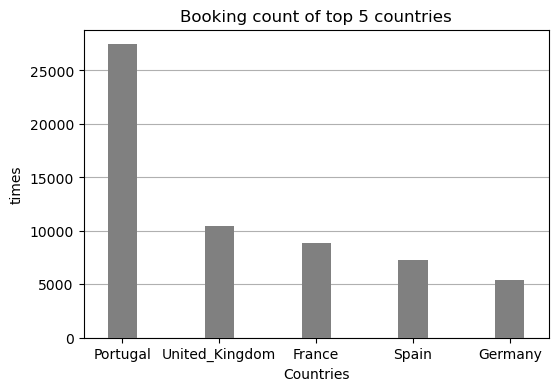

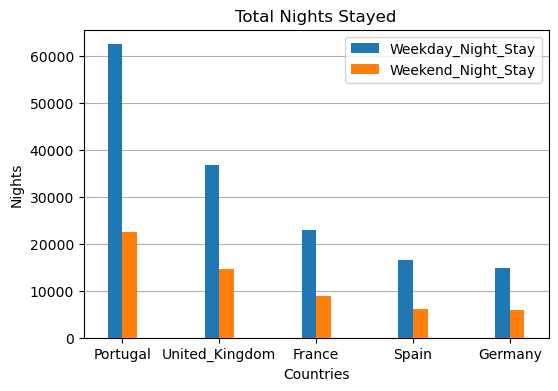

In [115]:

# plot the booking Count to see which is the highest
Top5_df.plot(
    x='Country',
    y='Booking_Count',
    kind='bar',
    width=0.3, 
    figsize=(6, 4), 
    zorder=3,
    color = 'gray',
    legend=False)
plt.title('Booking count of top 5 countries')
plt.xlabel('Countries')
plt.ylabel('times')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# compare Weekday_Night_Stay to Weekend_Night_Stay to see which is the highest
Top5_df.plot(
    x='Country',
    y=['Weekday_Night_Stay', 'Weekend_Night_Stay'] ,
    kind='bar', 
    width=0.3, 
    figsize=(6, 4), 
    zorder=3)
plt.title('Total Nights Stayed')
plt.xlabel('Countries')
plt.ylabel('Nights')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


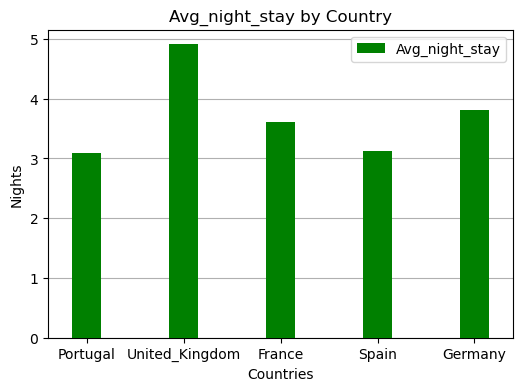

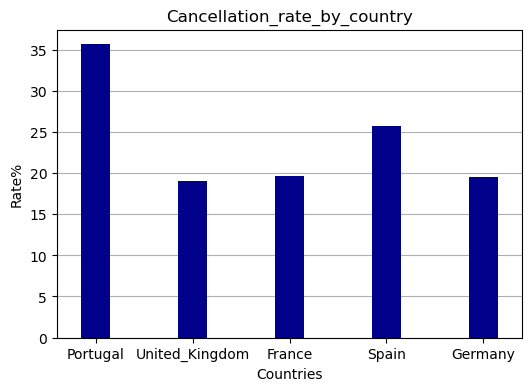

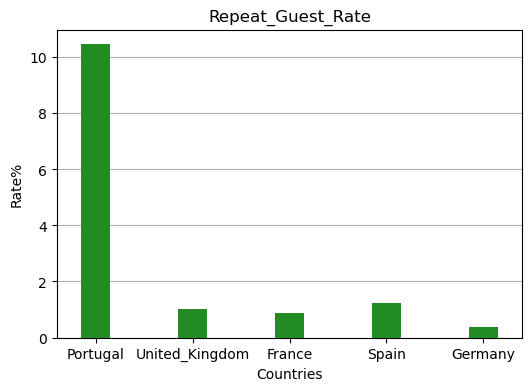

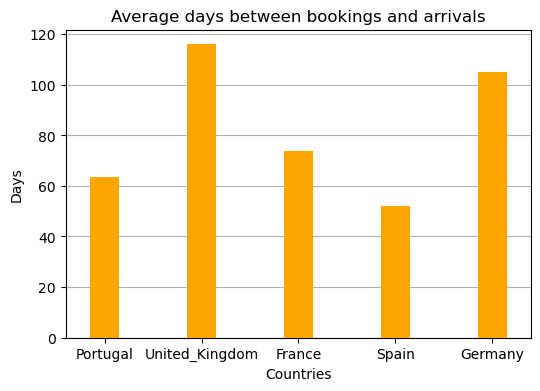

In [117]:
# compare Average night stay to see if Portugal is still the highest
Top5_df.plot(
    x='Country',
    y='Avg_night_stay' ,
    kind='bar', 
    width=0.3, 
    figsize=(6, 4), 
    color = 'green',
    zorder=3)
plt.title('Avg_night_stay by Country')
plt.xlabel('Countries')
plt.ylabel('Nights')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


# check the cancellation rate to find who doesn't change decision frequently
Top5_df.plot(
    x='Country',
    y='Cancellation_Rate',
    kind='bar', 
    width=0.3, 
    figsize=(6, 4), 
    zorder=3,
    color = 'darkblue',
    legend=False)
plt.title('Cancellation_rate_by_country')
plt.xlabel('Countries')
plt.ylabel('Rate%')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# chack repeat rate to analyse loyalty
Top5_df.plot(
    x='Country',
    y='Repeat_Guest_Rate',
    kind='bar', 
    width=0.3, 
    figsize=(6, 4), 
    zorder=3,
    color = 'forestgreen',
    legend=False)
plt.title('Repeat_Guest_Rate')
plt.xlabel('Countries')
plt.ylabel('Rate%')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# check Average Lead Time to see who book in advance more
Top5_df.plot(
    x='Country',
    y='Avg_Lead_Time',
    kind='bar', 
    width=0.3, 
    figsize=(6, 4), 
    zorder=3,
    color = 'orange',
    legend=False)
plt.title('Average days between bookings and arrivals')
plt.xlabel('Countries')
plt.ylabel('Days')
plt.xticks(rotation = 0)
plt.grid(axis='y')
plt.show()


### For Q3:

##### Top 5 countries account for  68.3  percent of the total bookings. From the plot ”Booking count of top 5 countries”, Portugal has the highest number with almost 50K bookings, followed by the United Kingdom and France with approximately 11,000 and 10,000 bookings respectively. That also explains why Portugal data leads the weekend and weekday night stay in the ”Total nights stayed” plot. 

##### The plot showing the average length of stay per booking shows that Portugal and Spain has the short average stay for 3 nights. This pattern suggests that Portuguese and Spanish travelers tend to have frequent short trips over the long ones.

##### When we look at the plot for cancellation rate and repeat guest rate, they revel that Portugal is the highest in both. Comparing them to Portugal's high booking numbers and shortest average stay duration, we can infer that the hotel might locate in or near Portugal, and the people make and cancel reservations at a higher rate than visitors from other countries. 

##### From the plot for cancellation rate, and Average time between bookings and arrivals, we can tell that people from the UK and Germany like to book further in advance than people from other four countries and german travelers have the lowest tendency to change their idea and cancel reservations once made.